In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt

from datetime import datetime
from sim_utils import *
from simulation import *


/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### dirichlet X mlp

In [2]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    "num_embeddings":10,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "dirichlet",
    "decoder_type": "mlp",
    "encoder_hidden_layers":[32,16],
    "decoder_hidden_layers":[32],
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):

    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("  ")
    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))

with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

100%|██████████| 5000/5000 [01:11<00:00, 69.64it/s]


Epoch   1	Iter   10	Loss:5.9756994	Rec Loss:2.0321250	MMD:3.9435744	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:7.6531785	Rec Loss:3.8471244	MMD:3.8060541	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.1141102	Rec Loss:1.9807860	MMD:0.1333244	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8530368	Rec Loss:3.8196959	MMD:0.0333411	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9772936	Rec Loss:1.9672301	MMD:0.0100635	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.8244360	Rec Loss:3.7822046	MMD:0.0422315	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9626869	Rec Loss:1.9560906	MMD:0.0065963	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6707627	Rec Loss:3.6475202	MMD:0.0232424	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:2.0185077	Rec Loss:2.0156035	MMD:0.0029043	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 5000/5000 [01:13<00:00, 67.59it/s]


Epoch   1	Iter   10	Loss:5.5865173	Rec Loss:2.0211833	MMD:3.5653343	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:8.2242611	Rec Loss:3.7793835	MMD:4.4448781	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0801909	Rec Loss:2.0053675	MMD:0.0748235	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.9593896	Rec Loss:3.7674610	MMD:0.1919286	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0013309	Rec Loss:1.9875109	MMD:0.0138200	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6791151	Rec Loss:3.6795544	MMD:-0.0004394	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9696217	Rec Loss:1.9608055	MMD:0.0088161	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6117805	Rec Loss:3.5962982	MMD:0.0154824	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9549513	Rec Loss:1.9507300	MMD:0.0042213	Sparsity_Loss:0.0000000	Pred_Loss:0

100%|██████████| 5000/5000 [01:18<00:00, 63.86it/s]


Epoch   1	Iter   10	Loss:5.9997611	Rec Loss:2.0300057	MMD:3.9697554	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:8.0222330	Rec Loss:3.7612179	MMD:4.2610145	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0721672	Rec Loss:1.9862789	MMD:0.0858882	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8607025	Rec Loss:3.7760333	MMD:0.0846693	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0100894	Rec Loss:1.9976768	MMD:0.0124125	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7189811	Rec Loss:3.6945188	MMD:0.0244622	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9792510	Rec Loss:1.9737244	MMD:0.0055267	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7696870	Rec Loss:3.7665643	MMD:0.0031227	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9726158	Rec Loss:1.9699364	MMD:0.0026795	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 5000/5000 [01:20<00:00, 61.97it/s]


Epoch   1	Iter   10	Loss:5.9852543	Rec Loss:2.0338259	MMD:3.9514287	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:7.4176977	Rec Loss:3.7738800	MMD:3.6438177	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.1059730	Rec Loss:2.0009153	MMD:0.1050576	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.9850711	Rec Loss:3.7252168	MMD:0.2598542	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0476286	Rec Loss:2.0413299	MMD:0.0062988	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6640760	Rec Loss:3.6445005	MMD:0.0195755	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9715856	Rec Loss:1.9693081	MMD:0.0022775	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6907934	Rec Loss:3.6189066	MMD:0.0718868	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9554359	Rec Loss:1.9568791	MMD:-0.0014433	Sparsity_Loss:0.0000000	Pred_Loss:0

100%|██████████| 5000/5000 [01:20<00:00, 62.39it/s]


Epoch   1	Iter   10	Loss:5.5508065	Rec Loss:1.9867878	MMD:3.5640187	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:8.4530388	Rec Loss:3.8364316	MMD:4.6166077	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.1648459	Rec Loss:2.0514138	MMD:0.1134322	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.9022392	Rec Loss:3.7168045	MMD:0.1854346	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0332763	Rec Loss:2.0170481	MMD:0.0162282	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6732844	Rec Loss:3.6592151	MMD:0.0140692	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9531076	Rec Loss:1.9450787	MMD:0.0080288	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6485246	Rec Loss:3.6492713	MMD:-0.0007468	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9890543	Rec Loss:1.9882228	MMD:0.0008315	Sparsity_Loss:0.0000000	Pred_Loss:0

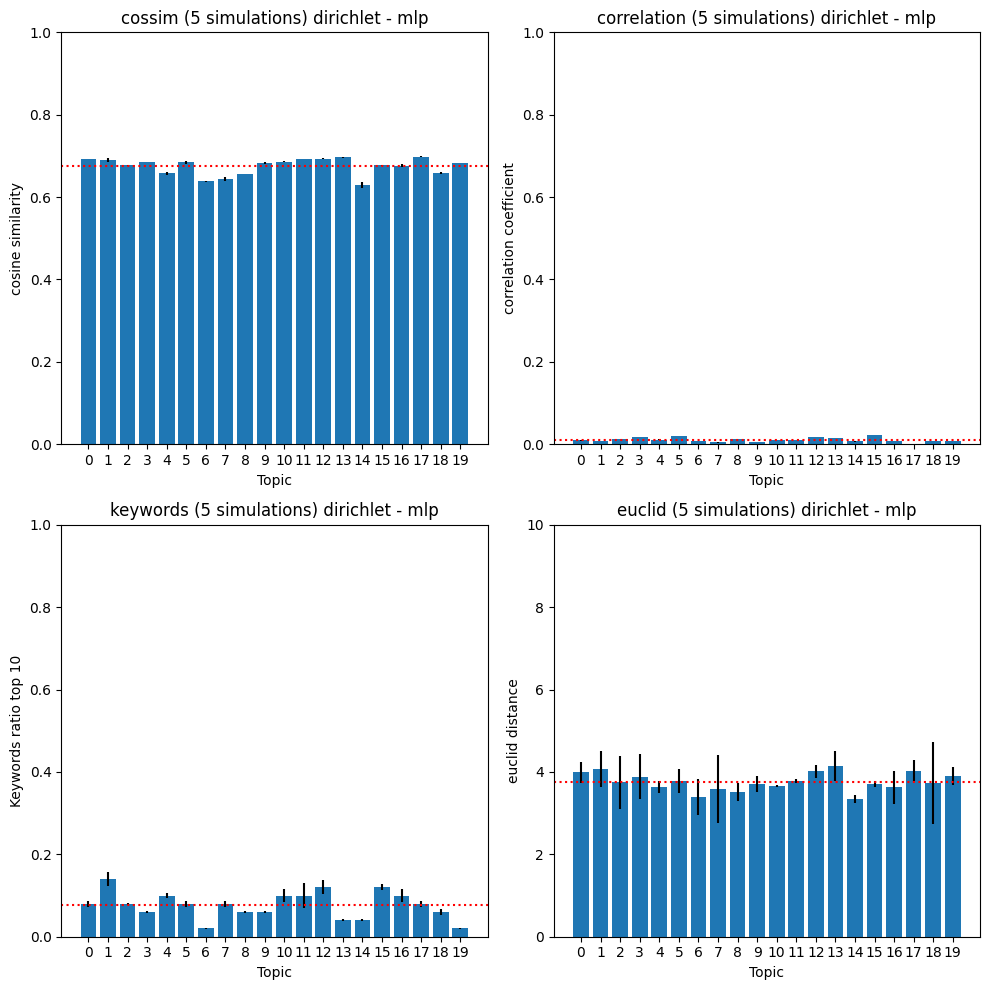

In [4]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

In [3]:
estimated_lambda_list[0]

array([[ 0.0000000e+00,  2.6934376e-01,  3.3030620e-01,  1.1464649e-01,
         3.8830870e-01,  2.4017878e-01,  5.1573988e-02, -2.1140774e-01,
         2.4861105e-01,  3.0112082e-01,  2.7184254e-01, -4.0158276e-02,
         4.2470214e-01,  9.6120544e-02,  4.2126817e-01, -4.1437352e-01,
         2.0187849e-01, -1.6811518e-01,  6.3605485e-03, -2.4106212e-01],
       [ 0.0000000e+00,  2.0270962e-03, -2.7903840e-03,  2.9398873e-04,
        -7.4347854e-04, -1.4440063e-03, -7.6921284e-04,  1.4775172e-03,
        -2.1605510e-03, -1.9368958e-03,  2.9813685e-04,  4.1550323e-03,
        -2.9842984e-03,  1.1111572e-03, -8.1936866e-03, -1.1043100e-02,
        -3.4677908e-03,  1.9204598e-03,  2.3932196e-03, -1.1883657e-03]],
      dtype=float32)

In [5]:
true_lambda_dirichlet_mlp[0]

array([[ 0.        ,  0.16637586,  0.05394987, -0.00393032, -0.1251587 ,
         0.09708061, -0.11122629,  0.3429595 ,  0.41484926, -0.16537199,
         0.24291153, -0.01991858,  0.01923106,  0.37678313, -0.47777745,
        -0.4616842 , -0.52859511,  0.28380634,  0.22934325,  0.32119864],
       [ 0.        , -0.17945978, -0.51713898, -0.19808917, -0.86034392,
        -0.33869732, -0.83526505, -0.03394943, -0.45677002, -0.5639564 ,
        -0.71406273, -0.20438465, -0.52246801, -0.41018439, -0.95982854,
        -0.36098285, -0.36652262, -0.36168435, -0.03487026, -0.29679804]])

In [6]:
estimated_lambda_list[1]

array([[ 0.00000000e+00,  1.15790486e-01,  2.13359848e-01,
        -2.24994496e-01,  2.46169358e-01,  1.21862486e-01,
         1.38490632e-01, -2.72829030e-02,  1.52944967e-01,
         4.11136538e-01, -2.31807400e-02,  3.99628311e-01,
         2.61691064e-01,  3.19218129e-01,  2.18495965e-01,
         1.50491521e-01,  2.46174246e-01,  2.42204666e-01,
        -1.44142099e-03,  2.73974270e-01],
       [ 0.00000000e+00,  1.59700308e-03,  2.07357015e-03,
         6.69021113e-03,  2.41010264e-03,  3.30755766e-03,
         3.76268383e-03,  8.63314699e-03,  3.43217328e-03,
        -1.62418000e-03,  7.04201544e-03,  3.70489527e-03,
         9.71704721e-05,  4.69824113e-03,  2.92303041e-03,
         4.78882296e-03,  3.49314231e-03,  2.61375122e-03,
         4.67326492e-04,  1.50707085e-03]], dtype=float32)

In [7]:
true_lambda_dirichlet_mlp[1]

array([[ 0.00000000e+00,  3.03302489e-01, -4.16907630e-01,
        -1.14689432e-01, -2.70266114e-01, -3.24683410e-01,
        -2.30761793e-01, -7.14612777e-02, -2.02545305e-02,
         1.21794729e-01,  2.17250970e-03,  2.68197496e-01,
        -2.12569755e-01,  4.61095432e-01, -3.89634412e-01,
         2.53445505e-01,  2.82797665e-04,  1.41667824e-01,
        -2.76635066e-01, -2.18920516e-01],
       [ 0.00000000e+00,  1.67517007e-01, -4.87320391e-01,
        -1.08421953e-01,  7.56445836e-02,  9.38620948e-02,
        -7.15700357e-01, -7.61689785e-01, -6.30914149e-01,
         7.73979348e-02, -7.02397735e-01, -3.79636944e-01,
         1.57144961e-01, -2.67579284e-01, -1.08867455e-01,
        -4.85228938e-01, -1.14243641e-01,  3.38811032e-02,
        -7.82456291e-01, -5.06002537e-02]])